In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("/work/aavocone/large_set.csv")

/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## get model and prediction

In [15]:

#test train split
X = df[df.columns[:-3]]    #exclude "signal" "classification" "B_sig_isSignalAcceptMissingNeutrino"
y = df["signal"]            
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5, stratify= ytrain)

model50 = xgb.XGBClassifier()
model50.load_model("/work/aavocone/models/model50.txt")

model100 = xgb.XGBClassifier()
model100.load_model("/work/aavocone/models/model100.txt")

model200 = xgb.XGBClassifier()
model200.load_model("/work/aavocone/models/model200.txt")

model500 = xgb.XGBClassifier()
model500.load_model("/work/aavocone/models/model500.txt")


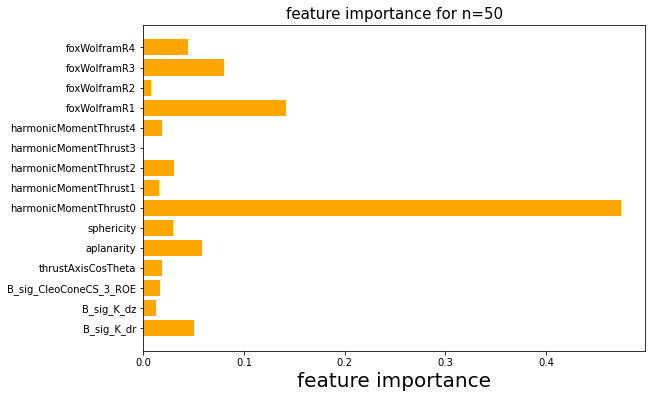

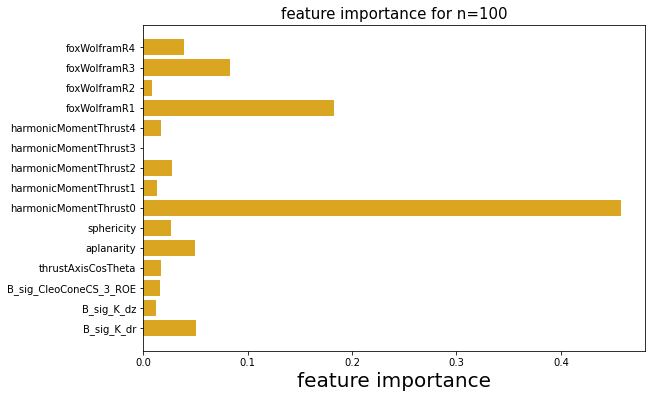

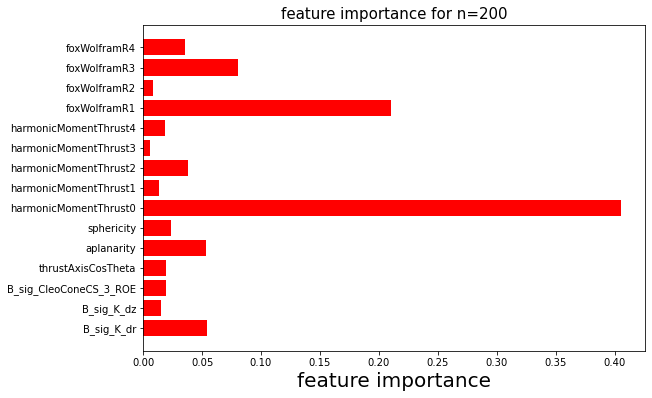

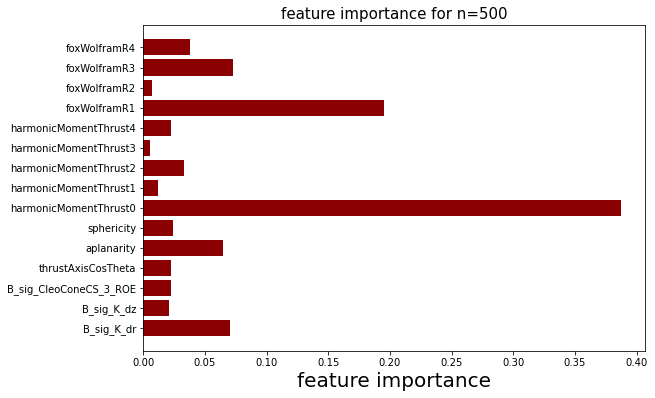

In [16]:
ranking50 = model50.feature_importances_
ranking100 = model100.feature_importances_
ranking200 = model200.feature_importances_
ranking500 = model500.feature_importances_

plt.figure(figsize=(9,6))
plt.barh(xtrain.columns,ranking50,color="orange")
plt.title("feature importance for n=50",fontsize=15)
plt.xlabel("feature importance",fontsize=20)
plt.savefig("/work/aavocone/week5/value_ranking50.jpeg")
plt.show()

plt.figure(figsize=(9,6))
plt.barh(xtrain.columns,ranking100,color="goldenrod")
plt.title("feature importance for n=100",fontsize=15)
plt.xlabel("feature importance",fontsize=20)
plt.savefig("/work/aavocone/week5/value_ranking100.jpeg")
plt.show()

plt.figure(figsize=(9,6))
plt.barh(xtrain.columns,ranking200,color="r")
plt.title("feature importance for n=200",fontsize=15)
plt.xlabel("feature importance",fontsize=20)
plt.savefig("/work/aavocone/week5/value_ranking200.jpeg")
plt.show()

plt.figure(figsize=(9,6))
plt.barh(xtrain.columns,ranking500,color="darkred")
plt.title("feature importance for n=500",fontsize=15)
plt.xlabel("feature importance",fontsize=20)
plt.savefig("/work/aavocone/week5/value_ranking500.jpeg")
plt.show()


## get plot from most important feature


can't happen, because model500 is trained on 15 values so model500.predict_proba expects 15 values.
ther model has to be retrained with just 1-2 values again


In [11]:
import functions as fc

index       = ["harmonicMomentThrust0", "foxWolframR1"]
binning = np.linspace(0,1,101)




for name in index:

#test train split
    X = df[["harmonicMomentThrust3", name] ]   #exclude "signal" "classification" "B_sig_isSignalAcceptMissingNeutrino"
    y = df["signal"]            
    xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)


    y500 = model500.predict_proba(xtest)[:,1]

    sh500,bh500,s500,b500,bin_edges = fc.efficiency(y500,ytest)


        #histogram
    plt.figure(figsize=(9,6))
    plt.hist(bh500,bins = binning, density=True, histtype="step", label = "background", color = "g")
    plt.hist(sh500,bins = binning, density=True, histtype="step", label = "signal", color = "r")
    plt.title(f"normalized histogram")
    plt.ylabel("Entries / ({:.2f} unit)".format(binning[1]-binning[0]), fontsize = 15)
    plt.xlabel("xgb probability", fontsize = 20)
    plt.legend()
    plt.savefig(f"/work/aavocone/week5/{name}.pdf", format="pdf",bbox_inches ="tight")
    plt.show()


ValueError: Feature shape mismatch, expected: 15, got 2